In [1]:
# load in required packages
import numpy as np
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
import pickle

In [2]:
# first for aggregate trip distance
city='Berlin'
fp='../outputs/ML_Results/shap/dist_agg/' + city + '.pkl'
with open(fp, 'rb') as f:
    shap_values=pickle.load(f)

fp='../outputs/ML_Results/shap/dist_agg/' + city + '_importance.pkl'
with open(fp, 'rb') as f:
    importance=pickle.load(f)

importance['cont_pc']=100*importance['shap_importance']/importance['shap_importance'].sum()
importance['Region']=city
importance_all=importance.copy()

for city in ['Paris','Madrid','Wien','Germany_other','France_other']:
    print(city)
    fp='../outputs/ML_Results/shap/dist_agg/' + city + '.pkl'
    with open(fp, 'rb') as f:
        shap_values=pickle.load(f)

    fp='../outputs/ML_Results/shap/dist_agg/' + city + '_importance.pkl'
    with open(fp, 'rb') as f:
        importance=pickle.load(f)

    importance['cont_pc']=100*importance['shap_importance']/importance['shap_importance'].sum()
    importance['Region']=city
    importance_all=pd.concat([importance_all,importance])

Paris
Madrid
Wien
Germany_other
France_other


In [3]:
importance_all.loc[importance_all['Region']=='France_other','Region']='France, other'
importance_all.loc[importance_all['Region']=='Germany_other','Region']='Germany, other'
importance_all.loc[importance_all['Region']=='Wien','Region']='Vienna'

In [4]:
# for distance agg
col_dict= {'DistCenter_res':'Dist. to city center','IntersecDensity_res':'Instersection density','street_length_res':'Avg. street length','Commute_Trip':'Commuting trip share',
       'UrbBuildDensity_res':'Built-up density','UrbPopDensity_res':'Population density', 'DistSubcenter_res':'Dist. to subcenter','Age':'Age',
       'LU_UrbFab_res':'Urban fab. land-use share', 'LU_Comm_res':'Commercial land-use share',
       'HHSize':'Household size','maxAgeHH':'Max householder age','InEmployment':'Employed'}

importance_plot=importance_all.copy()
importance_plot['column_name']=importance_plot['column_name'].map(col_dict)

In [5]:
i=importance_plot.groupby('column_name')['cont_pc'].mean().sort_values(ascending=False).index
ip=importance_plot.pivot("column_name", "Region", "cont_pc").reset_index()
ip.index=ip.column_name
ip.drop(columns='column_name',inplace=True)
ip=ip.reindex(i)
ip

Region,Berlin,"France, other","Germany, other",Madrid,Paris,Vienna
column_name,,,,,,
Dist. to city center,59.636723,33.168916,34.299498,44.009459,50.768378,39.26925
Population density,6.750009,26.352057,6.621553,11.806566,4.391041,40.995662
Commuting trip share,6.526621,16.632795,24.045279,9.182661,20.388625,19.735088
Dist. to subcenter,2.70222,7.887387,5.279881,13.401707,14.848545,NaN
Instersection density,10.96012,NaN,NaN,11.706166,2.867094,NaN
Built-up density,NaN,6.282625,11.010067,3.202095,NaN,NaN
Age,7.290099,1.209867,8.991712,0.639604,1.29756,NaN
Avg. street length,2.522218,5.152306,2.230397,2.697181,2.225141,NaN
Commercial land-use share,2.637052,0.827794,7.521613,0.458966,1.823665,NaN


In [6]:
ip_BP=ip.loc[:,['Berlin','Paris']].iloc[0:8,:]
ip_BP=ip_BP.loc[ip_BP.index!='Built-up density',]


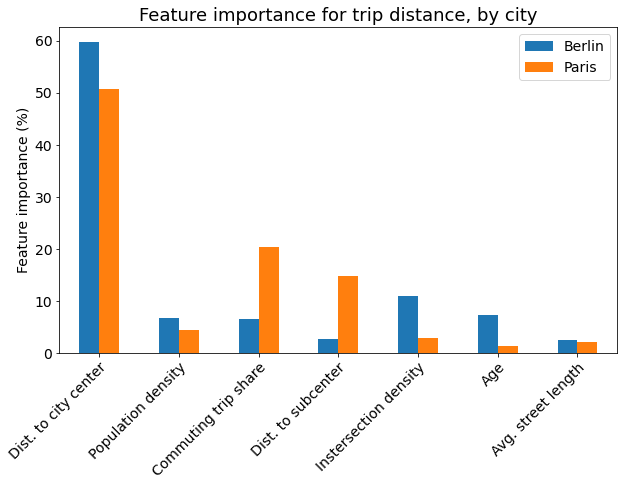

In [7]:
fig, ax = plt.subplots(figsize=(10,6))
ip_BP.loc[:,['Berlin','Paris']].iloc[0:8,:].plot(kind='bar',ax=ax)
plt.xticks(rotation = 45,fontsize=14,ha='right',rotation_mode='anchor')
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.xlabel('')
plt.ylabel('Feature importance (%)',fontsize=14)
plt.title('Feature importance for trip distance, by city',fontsize=18)
plt.savefig('../outputs/ML_Results/result_figures/dist_agg/FIcomp_BerlinParis.png',facecolor='w',dpi=150,bbox_inches='tight')

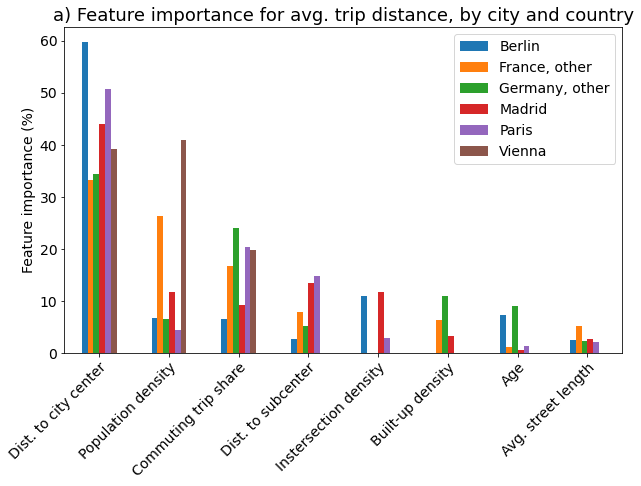

In [9]:
fig, ax = plt.subplots(figsize=(10,6))
ip.iloc[0:8,:].plot(kind='bar',ax=ax)
plt.xticks(rotation = 45,fontsize=14,ha='right',rotation_mode='anchor')
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.xlabel('')
plt.ylabel('Feature importance (%)',fontsize=14)
plt.title('a) Feature importance for avg. trip distance, by city and country',fontsize=18)
plt.savefig('../outputs/ML_Results/result_figures/dist_agg/FIcomp_cities.png',facecolor='w',dpi=65,bbox_inches='tight')

In [46]:
# mode choice
cities_all=['Berlin','Dresden','Düsseldorf','Frankfurt am Main','Kassel','Leipzig','Magdeburg','Potsdam','Clermont','Dijon','Lille','Lyon','Montpellier','Nantes','Nimes','Paris','Toulouse','Madrid','Wien','France','Germany','Madrid_Wien','France_other','Germany_other']
countries=['Germany','Germany','Germany','Germany','Germany','Germany','Germany','Germany','France','France','France','France','France','France','France','France','France','Spain','Austria','France','Germany','Spain_Austria','France','Germany']


In [47]:
#city='Berlin'
def mode_group_home(city):
    fp='../outputs/ML_Results/shap/mode_common_new/' + city + '.pkl'
    with open(fp, 'rb') as f:
        shap_valueslist=pickle.load(f)


    fp='../outputs/ML_Results/shap/mode_common_new/' + city + '_importance.pkl'
    with open(fp, 'rb') as f:
        importance_df=pickle.load(f)

    importance_df['cont_pc']=100*importance_df['shap_importance']/importance_df['shap_importance'].sum()
    importance_df['Region']=city
    importance_all=importance_df.copy()

    return importance_all


In [48]:
cities=pd.Series(['Berlin','Paris','Madrid','Wien','France_other','Germany_other'])
importance2=cities.apply(mode_group_home)
importance2

0                            column_name shap_impor...
1                            column_name shap_impor...
2                            column_name shap_impor...
3                            column_name shap_impor...
4                            column_name shap_impor...
5                            column_name shap_impor...
dtype: object

In [49]:
importance_all = pd.concat([importance2[0], importance2[1],importance2[2],importance2[3],importance2[4],importance2[5]])
importance_all.groupby('column_name')['cont_pc'].sum().sort_values(ascending=False)[0:20]

column_name
Trip_Distance                      230.50872
Age                                37.274465
CarOwnershipHH                     34.552527
Sex                                20.760834
DistCenter_res                      20.65795
UrbPopDensity_res                  19.409508
Trip_Purpose_Agg_Home↔Leisure      16.300245
bike_lane_share_res                15.438483
DistSubcenter_res                  13.845932
street_length_res                  13.793159
HHSize                              12.89825
transit_accessibility_res           12.68569
Trip_Purpose_Agg_Home↔Work         12.256695
LU_Comm_res                        11.617202
Trip_Purpose_Agg_Home↔Companion    10.815701
Education_University                 9.76679
LU_UrbFab_res                       9.102714
Trip_Purpose_Agg_Home↔Shopping      7.442347
UrbBuildDensity_res                 6.465687
Season_Winter                       6.267189
Name: cont_pc, dtype: object

In [13]:
col_dict= {'Trip_Distance':'Trip distance','CarOwnershipHH':'Car Ownership','Age':'Age','DistCenter_res':'Dist. to city center','transit_accessibility_res':'Transit accessibility',
           'Sex':'Sex','UrbPopDensity_res':'Population density','Trip_Purpose_Agg_Home↔Leisure':'Leisure Trip','bike_lane_share_res':'Cycle lane share'}


In [14]:
importance_all.loc[importance_all['Region']=='France_other','Region']='France, other'
importance_all.loc[importance_all['Region']=='Germany_other','Region']='Germany, other'
importance_all.loc[importance_all['Region']=='Wien','Region']='Vienna'


In [15]:
importance_plot=importance_all.copy()
importance_plot['column_name']=importance_plot['column_name'].map(col_dict)
importance_plot.groupby('column_name')['cont_pc'].mean().sort_values(ascending=False)

column_name
Trip distance            38.418120
Age                       6.212411
Car Ownership             5.758754
Sex                       3.460139
Dist. to city center      3.442992
Population density        3.234918
Leisure Trip              2.716708
Cycle lane share          2.573080
Transit accessibility     2.537138
Name: cont_pc, dtype: float64

In [16]:
importance_plot.dropna(inplace=True)
i=importance_plot.groupby('column_name')['cont_pc'].mean().sort_values(ascending=False).index

In [17]:
ip=importance_plot.pivot("column_name", "Region", "cont_pc").reset_index()
ip.index=ip.column_name
ip.drop(columns='column_name',inplace=True)
ip=ip.reindex(i)

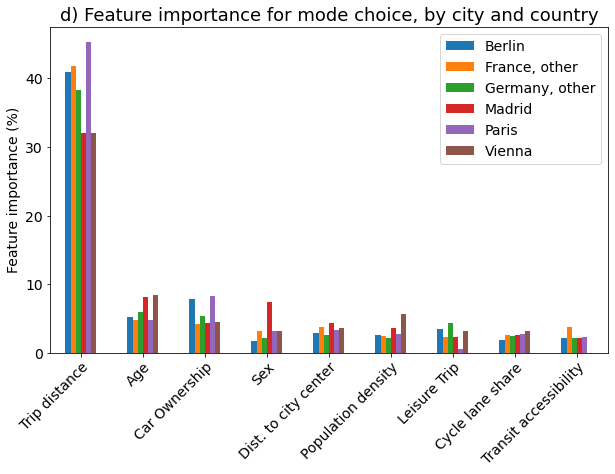

In [18]:
fig, ax = plt.subplots(figsize=(10,6))
ip.plot(kind='bar',ax=ax)
plt.xticks(rotation = 45,fontsize=14,ha='right',rotation_mode='anchor')
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.xlabel('')
plt.ylabel('Feature importance (%)',fontsize=14)
plt.title('d) Feature importance for mode choice, by city and country',fontsize=18)
plt.savefig('../outputs/ML_Results/result_figures/mode_common_new/FIcomp_cities.png',facecolor='w',dpi=65,bbox_inches='tight')

In [10]:
# and car ownership
def carown(city):
    fp='../outputs/ML_Results/shap/carown_new/' + city + '.pkl'
    with open(fp, 'rb') as f:
        shap_valueslist=pickle.load(f)


    fp='../outputs/ML_Results/shap/carown_new/' + city + '_importance.pkl'
    with open(fp, 'rb') as f:
        importance_df=pickle.load(f)

    importance_df['cont_pc']=100*importance_df['shap_importance']/importance_df['shap_importance'].sum()
    importance_df['Region']=city
    importance_all=importance_df.copy()

    return importance_all

In [11]:
cities=pd.Series(['Berlin','Paris','France_other','Germany_other'])
importance2=cities.apply(carown)

In [12]:
importance_all = pd.concat([importance2[0], importance2[1],importance2[2],importance2[3]])
importance_all.groupby('column_name')['cont_pc'].sum().sort_values(ascending=False)[0:10]

column_name
IncomeDetailed_Numeric    114.717948
HHSize                     55.590077
DistCenter                 54.598301
maxAgeHH                   43.164038
UrbPopDensity              23.643246
bike_lane_share            17.403245
UniversityEducation        16.016923
InEmployment               14.903582
transit_accessibility      12.643097
street_length              10.706563
Name: cont_pc, dtype: object

In [13]:
col_dict= {'DistCenter':'Dist. to city center','IntersecDensity':'Instersection density','bike_lane_share':'Cycle lane share',
       'UrbBuildDensity':'Built-up density','UrbPopDensity':'Population density','StreetsPerNode':'Streets per node','UniversityEducation':'University Educated',
       'IncomeDetailed_Numeric':'Income','HHSize':'Household size','maxAgeHH':'Max householder age','DistCenter':'Dist. to city center','transit_accessibility':'Transit Accessibility',
       'InEmployment':'Employed'}



In [14]:
importance_all.loc[importance_all['Region']=='France_other','Region']='France, other'
importance_all.loc[importance_all['Region']=='Germany_other','Region']='Germany, other'
importance_all.loc[importance_all['Region']=='Wien','Region']='Vienna'

In [15]:
importance_plot=importance_all.copy()
importance_plot['column_name']=importance_plot['column_name'].map(col_dict)
importance_plot.dropna(inplace=True)

In [16]:
i=importance_plot.groupby('column_name')['cont_pc'].mean().sort_values(ascending=False).index
ip=importance_plot.pivot("column_name", "Region", "cont_pc").reset_index()
ip.index=ip.column_name
ip.drop(columns='column_name',inplace=True)
ip=ip.reindex(i)
ip

Region,Berlin,"France, other","Germany, other",Paris
column_name,,,,
Income,21.146741,29.221453,31.188497,33.161257
Household size,17.531519,8.419818,17.651988,11.986752
Dist. to city center,18.151009,10.275647,9.768064,16.403581
Max householder age,13.793584,8.363131,10.868816,10.138506
Population density,4.751547,8.694542,3.093383,7.103775
Cycle lane share,1.891478,6.025267,4.967152,4.519347
Transit Accessibility,5.731295,NaN,2.606514,4.305287
University Educated,3.35495,7.986646,2.806729,1.868598
Employed,2.638532,5.962422,5.007975,1.294653


In [17]:
from matplotlib.colors import ListedColormap
cmap=ListedColormap(['tab:blue','tab:orange','tab:green','tab:purple'])

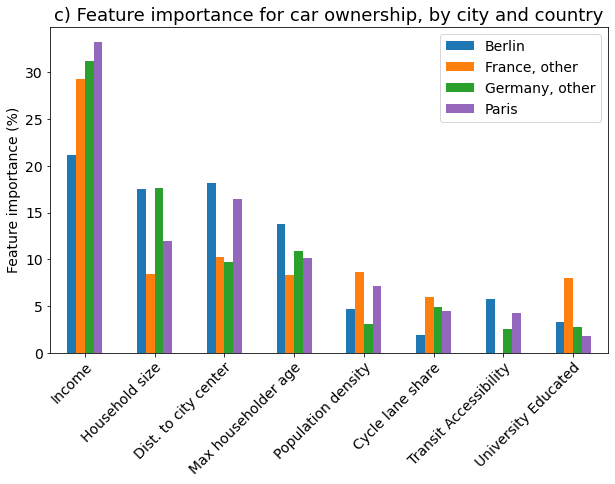

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
ip.iloc[0:8,:].plot(kind='bar',ax=ax,cmap=cmap)
plt.xticks(rotation = 45,fontsize=14,ha='right',rotation_mode='anchor')
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.xlabel('')
plt.ylabel('Feature importance (%)',fontsize=14)
plt.title('c) Feature importance for car ownership, by city and country',fontsize=18)
plt.savefig('../outputs/ML_Results/result_figures/carown_new/FIcomp_cities_new.png',facecolor='w',dpi=150,bbox_inches='tight')

In [29]:
# and distance for commuting
def distcomm(city):
    fp='../outputs/ML_Results/shap/dist_commute/' + city + '.pkl'
    with open(fp, 'rb') as f:
        shap_valueslist=pickle.load(f)


    fp='../outputs/ML_Results/shap/dist_commute/' + city + '_importance.pkl'
    with open(fp, 'rb') as f:
        importance_df=pickle.load(f)

    importance_df['cont_pc']=100*importance_df['shap_importance']/importance_df['shap_importance'].sum()
    importance_df['Region']=city
    importance_all=importance_df.copy()

    return importance_all
cities=pd.Series(['Berlin','Paris','Madrid','Wien','France_other','Germany_other'])
importance2=cities.apply(distcomm)

In [30]:
importance2

0                         column_name shap_importan...
1                         column_name shap_importan...
2                         column_name shap_importan...
3                         column_name shap_importan...
4                         column_name shap_importan...
5                         column_name shap_importan...
dtype: object

In [39]:
# first for commute trip distance
city='Berlin'
fp='../outputs/ML_Results/shap/dist_commute/' + city + '.pkl'
with open(fp, 'rb') as f:
    shap_values=pickle.load(f)

fp='../outputs/ML_Results/shap/dist_commute/' + city + '_importance.pkl'
with open(fp, 'rb') as f:
    importance=pickle.load(f)

importance['cont_pc']=100*importance['shap_importance']/importance['shap_importance'].sum()
importance['Region']=city
importance_all=importance.copy()

for city in ['Paris','Madrid','Wien','Germany_other','France_other']:
    print(city)
    fp='../outputs/ML_Results/shap/dist_commute/' + city + '.pkl'
    with open(fp, 'rb') as f:
        shap_values=pickle.load(f)

    fp='../outputs/ML_Results/shap/dist_commute/' + city + '_importance.pkl'
    with open(fp, 'rb') as f:
        importance=pickle.load(f)

    importance['cont_pc']=100*importance['shap_importance']/importance['shap_importance'].sum()
    importance['Region']=city
    importance_all=pd.concat([importance_all,importance])

Paris
Madrid
Wien
Germany_other
France_other


In [40]:
importance_all.loc[importance_all['Region']=='France_other','Region']='France, other'
importance_all.loc[importance_all['Region']=='Germany_other','Region']='Germany, other'
importance_all.loc[importance_all['Region']=='Wien','Region']='Vienna'

In [41]:
# for distance agg new
col_dict= {'DistCenter_res':'Dist. to city center','Sex':'Sex','Trip_Time_AM_Rush':'Time: Morning Rush Hour','UrbPopDensity_res':'Population density',
           'Age':'Age','UrbBuildDensity_res':'Built-up density','IntersecDensity_res':'Instersection density','Trip_Time_Nighttime Off-Peak':'Time: Night'}

importance_plot=importance_all.copy()
importance_plot['column_name']=importance_plot['column_name'].map(col_dict)

In [42]:
importance_plot.dropna(inplace=True)
importance_plot.groupby('column_name')['cont_pc'].mean().sort_values(ascending=False).head(15)

column_name
Dist. to city center       31.840257
Sex                        12.916095
Population density          6.243740
Age                         5.826024
Built-up density            5.349332
Instersection density       3.713796
Time: Night                 3.301960
Time: Morning Rush Hour     1.590275
Name: cont_pc, dtype: float64

In [43]:
i=importance_plot.groupby('column_name')['cont_pc'].mean().sort_values(ascending=False).index
ip=importance_plot.pivot("column_name", "Region", "cont_pc").reset_index()
ip.index=ip.column_name
ip.drop(columns='column_name',inplace=True)
ip=ip.reindex(i)
ip

Region,Berlin,"France, other","Germany, other",Madrid,Paris,Vienna
column_name,,,,,,
Dist. to city center,45.503709,33.946497,19.020458,38.657244,27.301301,26.612331
Sex,13.165327,9.716511,14.811887,8.914684,16.920384,13.967776
Population density,5.389681,3.458437,6.348914,4.044689,3.208195,15.012525
Age,4.654164,5.275295,10.150401,5.45121,2.879181,6.545896
Built-up density,NaN,2.090653,10.811695,5.368176,NaN,3.126803
Instersection density,3.558404,NaN,NaN,6.138352,1.444631,NaN
Time: Night,4.227457,0.000737,3.887868,0.464561,7.203765,4.027373
Time: Morning Rush Hour,0.727523,3.934733,0.148273,4.312965,0.37972,0.038436


Text(0.5, 1.0, 'Feature importance for trip distance, by city')

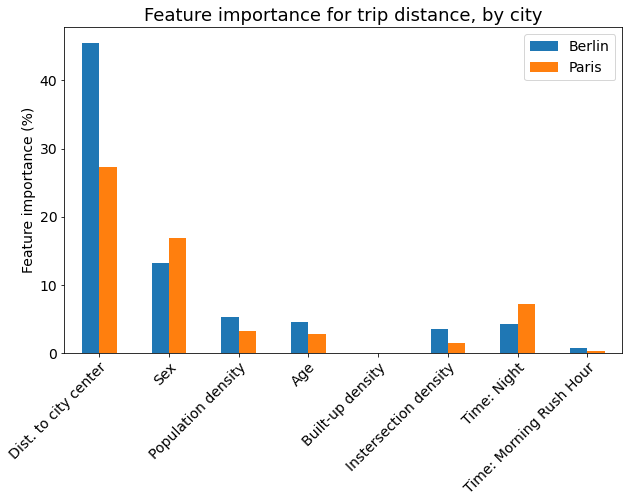

In [44]:
fig, ax = plt.subplots(figsize=(10,6))
#ip.iloc[0:7,:].plot(kind='bar',ax=ax)
ip.loc[:,['Berlin','Paris']].iloc[0:8,:].plot(kind='bar',ax=ax)
plt.xticks(rotation = 45,fontsize=14,ha='right',rotation_mode='anchor')
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.xlabel('')
plt.ylabel('Feature importance (%)',fontsize=14)
plt.title('Feature importance for trip distance, by city',fontsize=18)

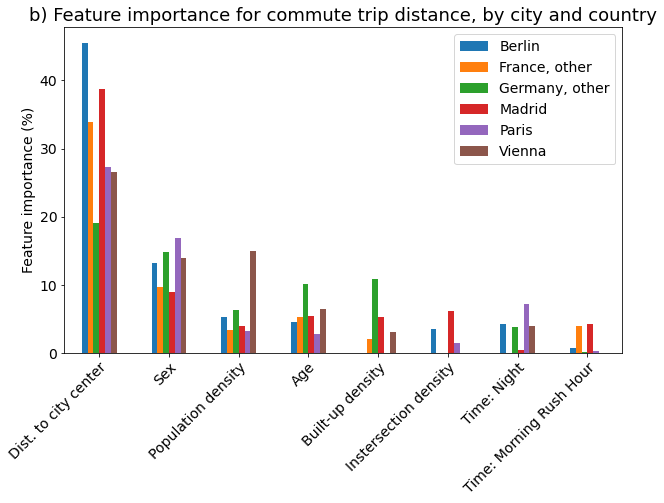

In [45]:
fig, ax = plt.subplots(figsize=(10,6))
ip.iloc[0:8,:].plot(kind='bar',ax=ax)
plt.xticks(rotation = 45,fontsize=14,ha='right',rotation_mode='anchor')
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.xlabel('')
plt.ylabel('Feature importance (%)',fontsize=14)
plt.title('b) Feature importance for commute trip distance, by city and country',fontsize=18)
plt.savefig('../outputs/ML_Results/result_figures/dist_commute/FIcomp_cities.png',facecolor='w',dpi=65,bbox_inches='tight')

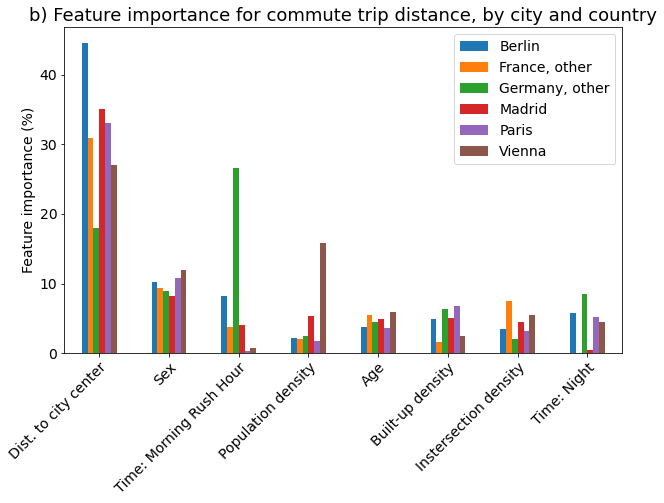

In [30]:
# fig, ax = plt.subplots(figsize=(10,6))
# ip.iloc[0:8,:].plot(kind='bar',ax=ax)
# plt.xticks(rotation = 45,fontsize=14,ha='right',rotation_mode='anchor')
# plt.yticks(fontsize=14)
# plt.legend(fontsize=14)
# plt.xlabel('')
# plt.ylabel('Feature importance (%)',fontsize=14)
# plt.title('b) Feature importance for commute trip distance, by city and country',fontsize=18)
# plt.savefig('../outputs/ML_Results/result_figures/dist_commute/FIcomp_cities.png',facecolor='w',dpi=65,bbox_inches='tight')